# Greater venue diversity might be required as Ottawa gets ‘Ready for Rail’


## *Capstone Project - The Battle of the Neighborhoods (Week 2)*
### *Author: Macumber*

## Table of contents
* [1) Introduction: Business Problem](#introduction)
* [2) Data](#data)
* [2.1) Find Station Locations](#locations)
* [2.2) Foursquare Category Key](#key)
* [2.3) Find Station Venues](#venues)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## 1) Introduction: Business Problem <a name="introduction"></a>

With the eminent opening of the new light rail transit system - The Confederation Line - Canada's capital, Ottawa, Ontario, is set to complete its largest transportation infrastructure project since the building of the Rideau Canal. With an expected increase in commuter traffic at rail stations along the Confederation Line it would be of interest to **know how the venues around the stations might change**. For example, is there a need for more Food venues at some of the stations. This information is of value **to small business owners looking for suitable locations**.

We can gain some insight into how venues might change by **comparing the types of venues around Ottawa stations** on the Confederation Line, to **types of venues around stations on a much older and more developed rail line**. Line 1 in Toronto, Ontario was opened in 1954 and is one of the busiest lines in North America.

Around each station we can assess the current proportion of each venue type (e.g., Food, Arts & Entertainment, Professional) and then compare each stations proportion to see if any differences exist, specifically between the Ottawa stations and the Toronto stations. Any major differences in the proportions of venue types could represent valuable targets for small business owners or companies to establish new ventures near Ottawa stations.

## 2) Data <a name="data"></a>

The Confederation Line is comprised of twelve stations while Line 1 has thirty-eight stations. I chose a subset of fourteen Line 1 stations, representing the original line opened in 1954 from Yonge to Spadina.

The Foursquare API was used to find all venues within a five-minute walking distance (416 m) of each station and collect the venue category (e.g., Food, Arts & Entertainment, College & University).

The Foursquare API uses over 900 subcategories for venues, which would make it difficult to do a general comparison between stations as some categories can be quite specific and not found at all stations. A category key was needed that translated all categories returned by the Foursquare API to one of the ten parent categories.

Using the venue category data and the category key proportions of each venue type (parent category) were generated for each station. This was then used for statistical analyses to compare differences and similarities between the proportions of venue types at rail stations.


### 2.1) Find Metro Station Locations <a name="locations"></a>

The first step is to get the Latitude and Longitude for all the Ottawa and Toronto stations.

**Import Libraries**

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


**Create the list of the metro stations**

In [3]:
Station_Names = ['Blair Station Ottawa ON',
                  'Cyrville Station Ottawa ON',
                  'St-Laurent Station Ottawa ON',
                  'Tremblay Station Ottawa ON',
                  'Hurdman Station Ottawa ON',
                  'Lees Station Ottawa ON',
                  'uOttawa Station Ottawa ON',
                  'Rideau Station Ottawa ON',
                  #'Parliament Station Ottawa ON', # this station is not in the database
                  'Lyon Station Ottawa ON',
                  'Pimisi Station Ottawa ON',
                  'Bayview Station Ottawa ON',
                   'Bloor-Yonge Station Toronto ON',
                   'Wellesley Station Toronto ON',
                   'College Station Toronto ON',
                   'Dundas Station Toronto ON',
                   'Queen Station Toronto ON',
                   'King Station Toronto ON',
                   'Union Station Toronto ON',
                   'St-Andrew Station Toronto ON',
                   'Osgoode Station Toronto ON',
                   'St-Patrick Station Toronto ON',
                   'Queens Park Station Toronto ON',
                   'Museum Station Toronto ON',
                   'St-George Station Toronto ON',
                   'Spadina Station Toronto ON']

**Create Empty Dataframe**

In [54]:
# define the dataframe columns
column_names = ['City', 'Station', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Stations = pd.DataFrame(columns=column_names)

# have a look
Stations

,City,Station,Latitude,Longitude


**Append Station Data**

Here we will use the Nominatim() function to return the latitude and longitude of our stations. We will then add the info to the empty dataframe (Stations) we just created.

In [55]:
for name in Station_Names:
    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(name)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geographical coordinate of the {} are {}, {}.'.format(name,latitude, longitude))
    
    name_split = name.split()
    
    City = name_split[-2]
    Station = name_split[0]
    
    Stations = Stations.append({'City': City,
                                'Station': Station,
                                'Latitude': latitude,
                                'Longitude': longitude}, ignore_index=True)
    
# Have a look
Stations.head()

,City,Station,Latitude,Longitude
0,Ottawa,Blair,45.431026,-75.608416
1,Ottawa,Cyrville,45.422745,-75.626372
2,Ottawa,St-Laurent,45.420605,-75.638188
3,Ottawa,Tremblay,45.416933,-75.653348
4,Ottawa,Hurdman,45.412335,-75.664425


**Fix Errors In Table**

In [57]:
# Queens is actually Queen's Park
Stations.iloc[21,1] = 'Queen\'s Park'

# Parliament Station is not in the Nominatum dataset. We need to add it manually
Stations = Stations.append({'City': 'Ottawa',
                                'Station': 'Parliament',
                                'Latitude': 45.421389,
                                'Longitude': -75.698889}, ignore_index=True)

**The Final Table**

In [58]:
Stations

,City,Station,Latitude,Longitude
0,Ottawa,Blair,45.431026,-75.608416
1,Ottawa,Cyrville,45.422745,-75.626372
2,Ottawa,St-Laurent,45.420605,-75.638188
3,Ottawa,Tremblay,45.416933,-75.653348
4,Ottawa,Hurdman,45.412335,-75.664425
5,Ottawa,Lees,45.416285,-75.670533
6,Ottawa,uOttawa,45.420677,-75.682466
7,Ottawa,Rideau,45.327995,-75.701521
8,Ottawa,Lyon,45.418518,-75.705015
9,Ottawa,Pimisi,45.413592,-75.713726


**Write File**

In [10]:
Stations.to_csv('Stations.csv', index = None)

### 2.2) Foursquare Category Key <a name="key"></a>

Next we need to create a table that can be used as a key to convert any Foursquare (sub)categories back to its main category heading. For example, "Italian Restaurant" to "Food".

**Import Libraries**

In [11]:
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests

print('Libraries imported.')

Libraries imported.


**Define Foursquare Credentials**

In [12]:
CLIENT_ID = [hidden] # your Foursquare ID
CLIENT_SECRET = [hidden] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
#url

**Make a request to Foursquare API**

We will request the complete list of Foursquare categories.

In [13]:
category_tree_json = requests.get(url).json()

#print(type(category_tree_json))
#category_tree_json

**Parent Category Names**


We will grouping all sub-categories to this level. So we need to create a reference list of the parent categories.

In [14]:
FirstLevel = []

for category in category_tree_json['response']['categories']:
    #print(category['name'])
    FirstLevel.append(category['name'])
    
FirstLevel

['Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

**All Categories**


Create a list that includes all (sub)category names. First the parent category is listed and then this is followed by all sub-categories. After all sub-categories from the parent are listed a blank element is added to the list. This is followed by the next parent category, and so on.

In [18]:
# Create an empty list to story category names
FourthLevel = []

# Create a list that will go through the category tree json and extract each level of category
for category in category_tree_json['response']['categories']:
    #print(category['name'])
    FourthLevel.append(category['name'])
    Sub1 = category['categories']
    for category1 in Sub1:
        #print(category1['name'])
        FourthLevel.append(category1['name'])
        Sub2 = list(category1['categories'])
        for category2 in Sub2:
            #print(category2['name'])
            FourthLevel.append(category2['name'])
            Sub3 = category2['categories']
            for category3 in Sub3:
                #print(category3['name'])
                FourthLevel.append(category3['name'])
    FourthLevel.append(' ')

# How many categories in the Foursquare category tree?
print('There are {} categories in the Foursquare category tree.'.format(len(FourthLevel)))

There are 934 categories in the Foursquare category tree.


**Create a List of Subcategories for each Parent Category**

Using the blank element inserted following the last parent subcategory, we can break our single list into multiple lists. Each of the sublists will be specific to one of the ten parent categories.

First step was to define a function for creating a list of lists.

In [19]:
# Code source:
# https://www.reddit.com/r/learnpython/comments/3sk1xj/splitting_a_list_in_sublists_by_values/

def split_list(iterable, splitters):

    #Find index of each splitter value in the list
    indexes = []
    for splitter in sorted(splitters):
        try:
            split = iterable.index(splitter)
            indexes.append(split)
        except ValueError:
            #Splitter not found in list
            pass

    #Split the iterable into sublists based on indices
    split_lists = []
    start = 0
    for index in sorted(indexes):
        split_lists.append(iterable[start:index])
        start = index
    split_lists.append(iterable[start:])

    return split_lists

**Apply the Splitting Function**

In [20]:
# The first element in each sublist will be the parent category
splitters = (FirstLevel)

# Apply the splitting function
FourSqKey_broken = split_list(iterable = FourthLevel, splitters = splitters)

# Remove the first element which is blank
del FourSqKey_broken[0]

# There should be 10 sublists one for each parent category
len(FourSqKey_broken)

10

**Create the Category Key**

For each category in the sublist we will associate the category with its Parent Category (first element in sublist). This will create a dataframe with Parent and Categories columns. We can then use it as our key to convert any Foursquare category back to its parent category.

In [32]:
columns = ['Parent', 'categories']

CategoryKey = pd.DataFrame(columns=columns)

for i in FourSqKey_broken:
    for y in i:
        #print('CategoryKey')
        #print(CategoryKey)
        temp_parent = i[0]
        temp_daughter = y
        CategoryKey = CategoryKey.append({'Parent':temp_parent, 'categories': temp_daughter}, ignore_index = True)
    

**Final Category Key**

In [33]:
CategoryKey.head()

,Parent,categories
0,Arts & Entertainment,Arts & Entertainment
1,Arts & Entertainment,Amphitheater
2,Arts & Entertainment,Aquarium
3,Arts & Entertainment,Arcade
4,Arts & Entertainment,Art Gallery


**Write File**

In [24]:
CategoryKey.to_csv('CategoryKey.csv', index = None)

### 2.3) Find Station Venues <a name="venues"></a>

Extract venue information for all stations in Ottawa and Toronto.

**Install Libraries**

In [25]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


**Define Function To Extract Categories From Venues**

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Make Foursquare API Request For Station Venues and Add Parent Categories**

In [59]:
Station_dfs = {}

NumberOfVenues = [] # a list of total venues at each station; empty
NumberOfUniqueCategories = [] #a list of unique categories at each station; empty
AllCategories = [] # a list of all subcategories in the dataset

radius = 416 # in meters; 5 min walk
LIMIT = 1000


for i in range(Stations.shape[0]):
        
    latitude = Stations.iloc[i,2]
    longitude = Stations.iloc[i,3]
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    
    results = requests.get(url).json()
    
    venues = results['response']['venues']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    print('{} venues were returned by Foursquare for {}.'.format(nearby_venues.shape[0], Stations.iloc[i,1]))
    
    # Add the total number of venues at this station to NumberOfVenues list
    NumberOfVenues.append(nearby_venues.shape[0])
    
    # Add the total number of unique categories to the NumberOfCategories list
    NumberOfUniqueCategories.append(len(set(nearby_venues['categories'])))
    
    # Add all categories returned to the AllCategories list
    AllCategories.append(nearby_venues['categories'].tolist())
    
    nearby_venues_parent = nearby_venues.merge(CategoryKey, on = 'categories')
    
    Station_dfs[Stations.iloc[i,1]] =nearby_venues_parent.groupby(['Parent']).size()
    
    

105 venues were returned by Foursquare for Blair.
104 venues were returned by Foursquare for Cyrville.
195 venues were returned by Foursquare for St-Laurent.
85 venues were returned by Foursquare for Tremblay.
125 venues were returned by Foursquare for Hurdman.
106 venues were returned by Foursquare for Lees.
131 venues were returned by Foursquare for uOttawa.
90 venues were returned by Foursquare for Rideau.
191 venues were returned by Foursquare for Lyon.
188 venues were returned by Foursquare for Pimisi.
184 venues were returned by Foursquare for Bayview.
200 venues were returned by Foursquare for Bloor-Yonge.
190 venues were returned by Foursquare for Wellesley.
175 venues were returned by Foursquare for College.
199 venues were returned by Foursquare for Dundas.
198 venues were returned by Foursquare for Queen.
199 venues were returned by Foursquare for King.
97 venues were returned by Foursquare for Union.
200 venues were returned by Foursquare for St-Andrew.
188 venues were retu

**Find out the total number of unique categories and by city**

In [60]:
## Create a list of the index position of stations belonging to a specific city
OttawaStations = [0,1,2,3,4,5,6,7,8,9,10,25]
TorontoStations = [11,12,13,14,15,16,17,18,19,20,21,22,23,24]


## create a method for non-contiguous slicing of lists
## code source: https://bugs.python.org/issue419903
def dice(a, b):
    return [ a[x] for x in b ]


## Create lists of categories specific to city
OttawaCategories = dice(AllCategories, OttawaStations)
TorontoCategories = dice(AllCategories, TorontoStations)


## How many unique categories for all stations
AllCategories_flatlist = []
for sublist in AllCategories:
    for item in sublist:
        AllCategories_flatlist.append(item)

print('A total of {} unique categories were returned by Foursquare.'.format(len(set(AllCategories_flatlist))))


## How many unique categories for Ottawa stations
OttawaCategories_flatlist = []
for sublist in OttawaCategories:
    for item in sublist:
        OttawaCategories_flatlist.append(item)

print('A total of {} unique categories were returned for Ottawa Stations by Foursquare.'.format(len(set(OttawaCategories_flatlist))))


## How many unique categories for Toronto stations
TorontoCategories_flatlist = []
for sublist in TorontoCategories:
    for item in sublist:
        TorontoCategories_flatlist.append(item)

print('A total of {} unique categories were returned for Toronto Stations by Foursquare.'.format(len(set(TorontoCategories_flatlist))))

A total of 393 unique categories were returned by Foursquare.
A total of 290 unique categories were returned for Ottawa Stations by Foursquare.
A total of 321 unique categories were returned for Toronto Stations by Foursquare.


**Create a Dataframe of Category Counts**

Merge all the station category counts into a single dataframe.

In [61]:
keys = list(Station_dfs.keys())

Stations_VenueCounts = pd.Series([])

for i in range(len(keys)):
    #print(i)
    #print(Station_dfs[keys[i]])
    Stations_VenueCounts = pd.concat([Stations_VenueCounts, Station_dfs[keys[i]]], axis=1, sort=True)
    #print(Stations_VenueCounts)

Stations_VenueCounts

,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arts & Entertainment,NaN,1.0,2.0,3.0,2.0,2.0,3.0,1.0,NaN,2.0,24,10,2.0,6.0,6.0,15.0,9.0,4.0,4.0,4.0,11.0,3.0,3.0,37.0,11.0,4.0,3.0
College & University,NaN,1.0,NaN,1.0,1.0,11.0,13.0,83.0,1.0,4.0,2,1,5.0,2.0,3.0,6.0,NaN,2.0,NaN,3.0,1.0,5.0,19.0,36.0,23.0,12.0,NaN
Event,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Food,NaN,26.0,8.0,35.0,16.0,15.0,15.0,11.0,13.0,25.0,34,25,25.0,41.0,36.0,59.0,36.0,31.0,23.0,39.0,31.0,46.0,35.0,14.0,12.0,25.0,28.0
Nightlife Spot,NaN,1.0,2.0,NaN,NaN,3.0,3.0,4.0,2.0,4.0,2,11,2.0,10.0,4.0,5.0,6.0,7.0,4.0,5.0,8.0,2.0,1.0,4.0,4.0,5.0,5.0
Outdoors & Recreation,NaN,4.0,2.0,1.0,4.0,14.0,11.0,6.0,7.0,7.0,21,10,5.0,5.0,6.0,10.0,3.0,7.0,1.0,4.0,15.0,4.0,3.0,11.0,4.0,6.0,6.0
Professional & Other Places,NaN,20.0,30.0,7.0,13.0,16.0,14.0,8.0,41.0,82.0,30,42,91.0,26.0,42.0,41.0,31.0,84.0,17.0,96.0,61.0,82.0,80.0,34.0,37.0,43.0,68.0
Residence,NaN,NaN,2.0,NaN,NaN,14.0,9.0,2.0,NaN,4.0,12,9,1.0,17.0,11.0,NaN,1.0,1.0,NaN,2.0,7.0,11.0,NaN,NaN,3.0,4.0,1.0
Shop & Service,NaN,35.0,36.0,133.0,20.0,15.0,10.0,5.0,15.0,21.0,28,51,50.0,61.0,44.0,47.0,98.0,37.0,12.0,29.0,15.0,28.0,23.0,14.0,13.0,24.0,34.0
Travel & Transport,NaN,10.0,11.0,1.0,24.0,26.0,16.0,4.0,5.0,28.0,16,11,8.0,11.0,10.0,5.0,7.0,14.0,29.0,12.0,25.0,8.0,6.0,5.0,7.0,61.0,5.0


Add Station Names and Transpose

In [62]:
## Column Names ##
# Give a title to first column
col01 = 'col01'

# Create a list of column name for the Stations_VenueCounts dataframe
column_names = [col01] + keys

# Assign column names to Stations_VenueCounts dataframe
Stations_VenueCounts.columns = [column_names]


## Drop First Empty Column ##
Stations_VenueCounts = Stations_VenueCounts.drop('col01', axis=1)

    
## Transpose the dataframe ##
Stations_VenueCounts = Stations_VenueCounts.transpose()

Drop Columns

In [63]:
## Drop Events Column. Greater than 25% NaNs ##
Stations_VenueCounts = Stations_VenueCounts.drop('Event', axis=1)


## Drop Residence Column. Greater than 25% NaNs ##
Stations_VenueCounts = Stations_VenueCounts.drop('Residence', axis=1)

Replace NaNs

In [64]:
## Replace NaN with 0s
Stations_VenueCounts = Stations_VenueCounts.fillna(0)

Add Columns

In [66]:
## Add total venue count for each station
Stations_VenueCounts['Total Venues'] = NumberOfVenues

## Add total number of unique categories for each station
Stations_VenueCounts['Unique Categories'] = NumberOfUniqueCategories

## Add city column
Stations_VenueCounts['City'] = Stations['City'].values # series with different index

## Add Latitude column
Stations_VenueCounts['Latitude'] = Stations['Latitude'].values # series with different index

## Add Longitude column
Stations_VenueCounts['Longitude'] = Stations['Longitude'].values # series with different index

Reorder Columns

In [67]:
Stations_VenueCounts = Stations_VenueCounts[[
    'City',
    'Latitude',
    'Longitude',
    'Arts & Entertainment',
    'College & University',
    'Food',
    'Nightlife Spot',
    'Outdoors & Recreation',
    'Professional & Other Places',
    'Shop & Service',
    'Travel & Transport',
    'Total Venues',
    'Unique Categories'
]]

**Final Dataframe: Stations Category Counts**

In [68]:
Stations_VenueCounts_Sorted = Stations_VenueCounts.rename_axis('Station').sort_values(by = ['City', 'Station'], ascending = [True, True])
Stations_VenueCounts_Sorted

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Total Venues,Unique Categories
Station,,,,,,,,,,,,,
Bayview,Ottawa,45.409230,-75.722323,10.0,1.0,25.0,11.0,10.0,42.0,51.0,11.0,184,99
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,26.0,1.0,4.0,20.0,35.0,10.0,105,63
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,8.0,2.0,2.0,30.0,36.0,11.0,104,60
Hurdman,Ottawa,45.412335,-75.664425,2.0,11.0,15.0,3.0,14.0,16.0,15.0,26.0,125,62
Lees,Ottawa,45.416285,-75.670533,3.0,13.0,15.0,3.0,11.0,14.0,10.0,16.0,106,61
Lyon,Ottawa,45.418518,-75.705015,2.0,4.0,25.0,4.0,7.0,82.0,21.0,28.0,191,73
Parliament,Ottawa,45.421389,-75.698889,3.0,0.0,28.0,5.0,6.0,68.0,34.0,5.0,158,69
Pimisi,Ottawa,45.413592,-75.713726,24.0,2.0,34.0,2.0,21.0,30.0,28.0,16.0,188,89
Rideau,Ottawa,45.327995,-75.701521,0.0,1.0,13.0,2.0,7.0,41.0,15.0,5.0,90,50


**Write File**

In [42]:
Stations_VenueCounts_Sorted.to_csv('Stations_VenueCounts.csv', index = True)

# Box Plots of Venue Categories

_Examine the amount of variation present in each feature across all stations_

### Import Libraries

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt # scripting interface
%matplotlib inline

mpl.style.use('ggplot') # ggplot-like style

import numpy as np # work with arrays
from sklearn import preprocessing # normalize dataset
from sklearn.preprocessing import RobustScaler # dealing with outliers

### Load Data

In [3]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts.csv', index_col = 0)
print(Stations_VenueCounts.head())

            City   Latitude  Longitude  Arts & Entertainment  \
Bayview   Ottawa  45.409230 -75.722323                    10   
Blair     Ottawa  45.431026 -75.608416                     1   
Cyrville  Ottawa  45.422745 -75.626372                     2   
Hurdman   Ottawa  45.412357 -75.664320                     2   
Lees      Ottawa  45.416366 -75.670539                     3   

          College & University  Food  Nightlife Spot  Outdoors & Recreation  \
Bayview                      1    25              11                     10   
Blair                        1    26               1                      4   
Cyrville                     0     8               2                      2   
Hurdman                     11    15               3                     14   
Lees                        13    15               3                     11   

          Professional & Other Places  Shop & Service  Travel & Transport  \
Bayview                            42              51          

### Convert to Percentage


Convert to venue category count to percentage of total venues at each Station

In [5]:
data_000 = Stations_VenueCounts.iloc[:,3:11]

data_001 = data_000.div(data_000.sum(1), 0).round(2)
data_002 = data_001*100

data_002

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Bayview,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0
Blair,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0
Cyrville,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0
Hurdman,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0
Lees,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0
Lyon,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0
Parliament,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0
Pimisi,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0
Rideau,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0
St-Laurent,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0


### Box Plots

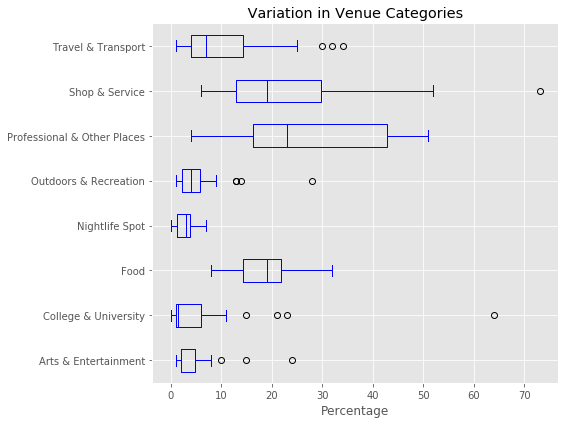

In [7]:
data_002.plot(kind = 'box',
              figsize=(8, 6),
              color = 'blue',
              vert = False # if you prefer horizontal
             )

plt.title(' Variation in Venue Categories ')
plt.xlabel('Percentage')

plt.tight_layout()

plt.savefig('Macumber_Coursera_Capstone_Figure01.png') # has to be before plt.show()

plt.show()

### Final Dataframe

In [14]:
Stations_VenueCounts_tomerge = Stations_VenueCounts[['City', 'Latitude', 'Longitude']]

Stations_VenueCounts_Percent = Stations_VenueCounts_tomerge.merge(data_002, left_index = True, right_index = True)

Stations_VenueCounts_Percent

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0
Pimisi,Ottawa,45.413592,-75.713726,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0
St-Laurent,Ottawa,45.420605,-75.638188,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0


### Export the file

In [15]:
Stations_VenueCounts_Percent.to_csv('Stations_VenueCounts_Percent.csv')

### Perform Hierarchical Clustering

Visualise which stations cluster together based on their venue types.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # normalize dataset

import scipy # scipy clustering
import pylab # scipy clustering
from scipy.cluster import hierarchy # scipy clustering
from scipy.cluster.hierarchy import fcluster

from scipy.spatial import distance_matrix # SCIKIT cluster

import matplotlib.cm as cm # SCITKIT visualize

from scipy import ndimage



from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs




print('Libraries imported.')

Libraries imported.


### Load Dataset

In [2]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts_Percent.csv', index_col = 0)
print(Stations_VenueCounts.head())

            City   Latitude  Longitude  Arts & Entertainment  \
Bayview   Ottawa  45.409230 -75.722323                   6.0   
Blair     Ottawa  45.431026 -75.608416                   1.0   
Cyrville  Ottawa  45.422745 -75.626372                   2.0   
Hurdman   Ottawa  45.412357 -75.664320                   2.0   
Lees      Ottawa  45.416366 -75.670539                   3.0   

          College & University  Food  Nightlife Spot  Outdoors & Recreation  \
Bayview                    1.0  16.0             7.0                    6.0   
Blair                      1.0  27.0             1.0                    4.0   
Cyrville                   0.0   9.0             2.0                    2.0   
Hurdman                   11.0  15.0             3.0                   14.0   
Lees                      15.0  17.0             3.0                   13.0   

          Professional & Other Places  Shop & Service  Travel & Transport  
Bayview                          26.0            32.0           

### Hierarchical Cluster Analysis

Distance Matrix

In [6]:
data_000 = Stations_VenueCounts.iloc[:,3:11]

dist_matrix = distance_matrix(data_000, data_000)

dist_matrix

array([[ 0.        , 15.71623365, 15.65247584, 30.16620626, 29.93325909,
        31.32091953, 23.3023604 , 21.3541565 , 26.55183609, 47.95831523,
        27.5680975 , 70.87312608, 25.63201124, 10.09950494, 19.02629759,
        23.13006701, 37.88139385, 26.75817632, 23.49468025, 31.09662361,
        34.278273  , 31.30495168, 30.06659276, 28.93095228, 34.2636834 ,
        15.19868415],
       [15.71623365,  0.        , 22.8035085 , 32.10918872, 32.41913015,
        38.88444419, 31.04834939, 25.03996805, 29.12043956, 42.20189569,
        24.2693222 , 73.37574531, 34.3220046 , 12.04159458, 16.03121954,
        31.8747549 , 46.17358552, 33.92639091, 19.92485885, 37.28270376,
        36.49657518, 38.4317577 , 38.82009789, 33.49626845, 32.29551052,
         8.24621125],
       [15.65247584, 22.8035085 ,  0.        , 37.21558813, 38.74274126,
        32.09361307, 25.37715508, 33.83784863, 36.49657518, 46.44351408,
        31.19294792, 76.64202503, 23.32380758, 20.22374842, 31.79622619,
       

Clustering

In [7]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\DataScience\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Visualization

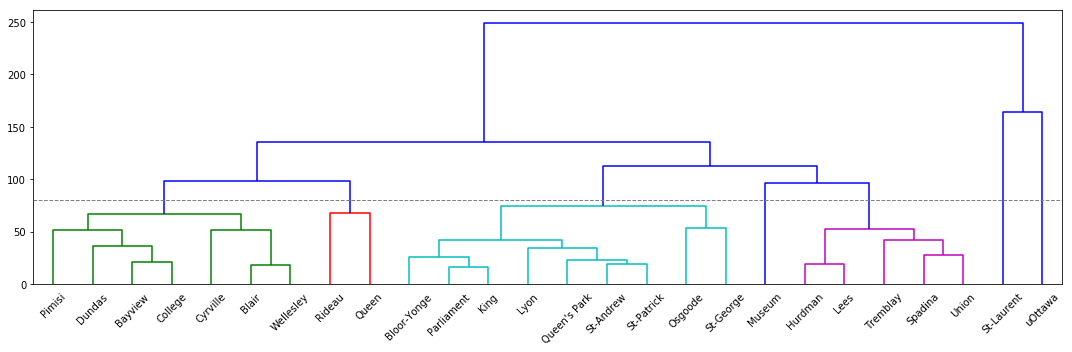

In [13]:
fig = pylab.figure(figsize=(15,5))

dendro = hierarchy.dendrogram(Z, labels = data_000.index, color_threshold = 80)

plt.axhline(y=80, c='grey', lw=1, linestyle='dashed')

plt.tight_layout()

plt.savefig('Macumber_Coursera_Capstone_Figure02.png') # has to be before plt.show()


_Based on the above figure the majority of stations cluster at distances <50. This level would result in eight clusters with only one member. Increasing the cut-off to 80 reduces the number of clusters with only one member to three. Thus we have selected 7 clusters for the final result._

Generate Cluster Labels

In [14]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

C:\DataScience\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 2, 4, 4, 0, 0, 2, 1, 5, 4, 3, 0, 2, 2, 0, 6, 0, 1, 0, 4, 0,
       0, 0, 4, 2], dtype=int64)

Add Cluster To Each Row

In [15]:
results_000 = Stations_VenueCounts

results_000['Cluster']=agglom.labels_
results_000.head()

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0,2
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0,4


### Final Dataframe

In [28]:
results_001 = results_000.sort_values(by = ['Cluster', 'City'])

results_001

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0
Queen's Park,Toronto,43.659980,-79.390369,2.0,11.0,21.0,1.0,2.0,47.0,14.0,4.0,0
St-Andrew,Toronto,43.647792,-79.384871,2.0,2.0,20.0,3.0,2.0,51.0,15.0,6.0,0
St-George,Toronto,43.668641,-79.398019,10.0,21.0,11.0,4.0,4.0,33.0,12.0,6.0,0
St-Patrick,Toronto,43.654820,-79.388274,2.0,3.0,26.0,1.0,2.0,46.0,16.0,4.0,0
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0,1


In [33]:
results_002 = results_001.drop(['Latitude','Longitude'],1)

results_003 = results_002.groupby('Cluster').mean().round(1)

results_003

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Cluster,,,,,,,,
0,3.2,4.9,17.7,2.7,3.8,44.4,16.3,7.3
1,3.5,0.5,17.5,4.5,15.0,14.0,41.0,4.5
2,5.7,1.3,22.1,3.3,5.3,23.4,31.1,8.0
3,1.0,64.0,8.0,3.0,5.0,10.0,6.0,3.0
4,2.6,6.8,18.4,2.6,7.2,18.4,15.6,28.0
5,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0
6,24.0,23.0,9.0,3.0,7.0,22.0,9.0,3.0


Examine Members of Each Cluster

In [34]:
results_000.loc[results_000['Cluster'] == 0]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0
Queen's Park,Toronto,43.659980,-79.390369,2.0,11.0,21.0,1.0,2.0,47.0,14.0,4.0,0
St-Andrew,Toronto,43.647792,-79.384871,2.0,2.0,20.0,3.0,2.0,51.0,15.0,6.0,0
St-George,Toronto,43.668641,-79.398019,10.0,21.0,11.0,4.0,4.0,33.0,12.0,6.0,0
St-Patrick,Toronto,43.654820,-79.388274,2.0,3.0,26.0,1.0,2.0,46.0,16.0,4.0,0


In [35]:
results_000.loc[results_000['Cluster'] == 1]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0,1
Queen,Toronto,43.652908,-79.379458,5.0,0.0,19.0,3.0,2.0,16.0,52.0,4.0,1


In [36]:
results_000.loc[results_000['Cluster'] == 2]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0,2
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
Pimisi,Ottawa,45.413592,-75.713726,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0,2
College,Toronto,43.660662,-79.382795,4.0,2.0,24.0,3.0,4.0,28.0,29.0,7.0,2
Dundas,Toronto,43.656537,-79.381022,8.0,3.0,32.0,3.0,5.0,22.0,25.0,3.0,2
Wellesley,Toronto,43.665403,-79.383600,4.0,1.0,25.0,6.0,3.0,16.0,38.0,7.0,2


In [37]:
results_000.loc[results_000['Cluster'] == 3]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
uOttawa,Ottawa,45.42053,-75.68228,1.0,64.0,8.0,3.0,5.0,10.0,6.0,3.0,3


In [38]:
results_000.loc[results_000['Cluster'] == 4]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0,4
Tremblay,Ottawa,45.416933,-75.653348,2.0,1.0,20.0,0.0,5.0,16.0,25.0,30.0,4
Spadina,Toronto,43.667235,-79.403686,2.0,7.0,14.0,3.0,3.0,24.0,13.0,34.0,4
Union,Toronto,43.644690,-79.379966,4.0,0.0,26.0,4.0,1.0,19.0,13.0,32.0,4


In [39]:
results_000.loc[results_000['Cluster'] == 5]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
St-Laurent,Ottawa,45.420605,-75.638188,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0,5


In [40]:
results_000.loc[results_000['Cluster'] == 6]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Museum,Toronto,43.667097,-79.393606,24.0,23.0,9.0,3.0,7.0,22.0,9.0,3.0,6


Output the File

In [41]:
results_001.to_csv('Stations_VenueCounts_Clustered.csv')
results_003.to_csv('Stations_VenueCounts_Clustered_Averaged.csv')

### Import Library

In [ ]:
# in anaconda prompt install
# pip install pydotplus
# pip install graphviz

In [1]:
import numpy as np # arrays
import pandas as pd # dataframes

from sklearn.model_selection import train_test_split # Train/Test Split

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics # evaluation

import matplotlib.pyplot as plt #visualisation

# show the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Import Data

In [2]:
data_000 = pd.read_csv('Stations_VenueCounts_Clustered.csv', index_col = 0)
data_000.head()

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0


### Assign

Define feature set X

In [3]:
X = data_000[['Arts & Entertainment'
                                   , 'College & University'
                                   , 'Food'
                                   , 'Nightlife Spot'
                                   , 'Outdoors & Recreation'
                                   , 'Professional & Other Places'
                                   , 'Shop & Service'
                                   , 'Travel & Transport'
                                  ]].values

Define labels for the feature set

In [4]:
Y = data_000['Cluster'].values

### Train / Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size = 0.2, 
    random_state=3)

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (20, 8) (20,)
Test set: (6, 8) (6,)


### Decision Tree


Create an instance

In [14]:
dtree = DecisionTreeClassifier()

Fit the model

In [15]:
dtree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualise the model

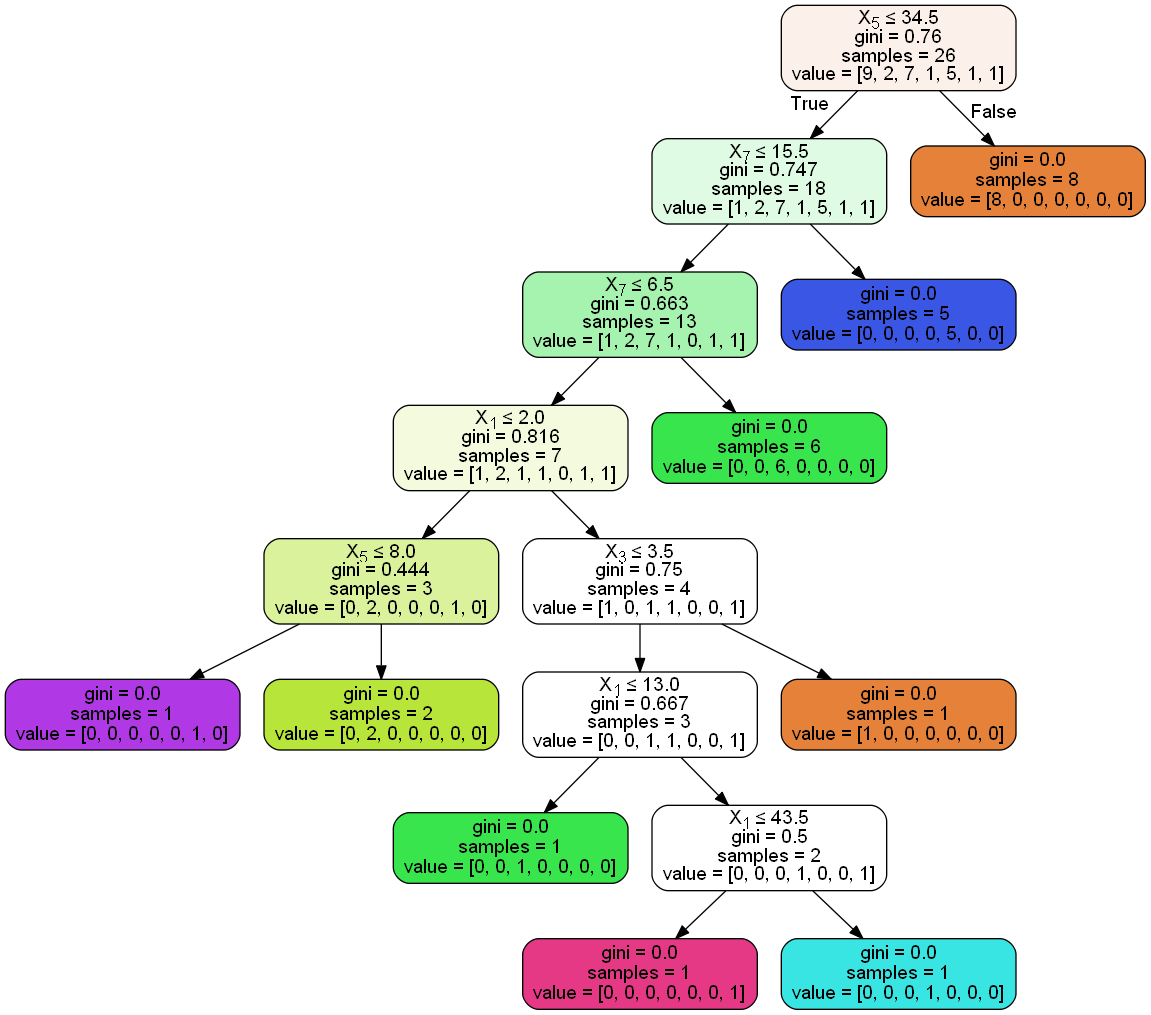

In [16]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

#plt.tight_layout()

#plt.savefig('Macumber_Coursera_Capstone_Figure03.png') # has to be before plt.show()